In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#將路徑簡寫為mydrive
!ln -s /content/drive/My\ Drive/ /mydrive

Mounted at /content/drive


In [2]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15138, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 15138 (delta 29), reused 50 (delta 23), pack-reused 15073
Receiving objects: 100% (15138/15138), 13.47 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (10274/10274), done.


In [3]:
%cd ./darknet

/content/darknet


In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
#!gdown https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
#!gdown https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
#!gdown https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
#!gdown https://drive.google.com/uc?id=1Zl3rh0ZOPVj4DPZdae8WqqZU0NLX7Ncp

Downloading...
From: https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
To: /content/darknet/yolov3.weights
248MB [00:03, 63.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
To: /content/darknet/darknet53.conv.74
162MB [00:02, 54.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
To: /content/darknet/yolov4.weights
258MB [00:03, 82.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zl3rh0ZOPVj4DPZdae8WqqZU0NLX7Ncp
To: /content/darknet/yolov4.conv.137
170MB [00:00, 179MB/s]


##上傳自己修改的東西、備份權重檔

In [ ]:
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/obj.zip ./..
#解壓縮到data資料夾
!unzip ../obj.zip -d data/obj
!rm ../obj.zip

In [5]:
#上傳自己修改cfg
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/yolov4_custom.cfg ./cfg
#上傳自己的資料集
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/obj.data ./data
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/obj.names ./data

#上傳generate_train.py
#!cp /mydrive/109_2_multimedia/FinalProject_YOLO/generate_train.py ./
#運行生成的train.txt
#!python generate_train.py

In [6]:
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/backup/* ./backup/

##訓練

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov4_custom.cfg yolov4.conv.137 -dont_show
#使用上次的紀錄
!./darknet detector train data/obj.data cfg/yolov4_custom.cfg backup/yolov4_custom_last.weights -dont_show

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.869420), count: 3, class_loss = 0.003025, iou_loss = 46.607407, total_loss = 46.610432 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.877431), count: 5, class_loss = 0.001252, iou_loss = 31.915335, total_loss = 31.916586 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.894537), count: 1, class_loss = 0.000012, iou_loss = 4.926490, total_loss = 4.926502 
 total_bbox = 1470254, rewritten_bbox = 1.365954 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000073, iou_loss = 0.000000, total_loss = 0.000073 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.834377), count: 5, class_loss = 1.686440, iou_loss = 29.136936, total_loss = 30.823376 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (

In [ ]:
!cp ./backup/yolov4_custom_6000.weights /mydrive/109_2_multimedia/FinalProject_YOLO/backup/
!cp ./backup/yolov4_custom_last.weights /mydrive/109_2_multimedia/FinalProject_YOLO/backup/
!cp ./backup/yolov4_custom_final.weights /mydrive/109_2_multimedia/FinalProject_YOLO/backup/

##測試

In [7]:
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/test_obj.zip ./..
!unzip ../test_obj.zip -d data/objTest
!rm ../test_obj.zip

Archive:  ../test_obj.zip
  inflating: data/objTest/005001.png  
  inflating: data/objTest/005001.txt  
  inflating: data/objTest/005002.png  
  inflating: data/objTest/005002.txt  
  inflating: data/objTest/005003.png  
  inflating: data/objTest/005003.txt  
  inflating: data/objTest/005004.png  
  inflating: data/objTest/005004.txt  
  inflating: data/objTest/005005.png  
 extracting: data/objTest/005005.txt  
  inflating: data/objTest/005006.png  
  inflating: data/objTest/005006.txt  
  inflating: data/objTest/005007.png  
 extracting: data/objTest/005007.txt  
  inflating: data/objTest/005008.png  
  inflating: data/objTest/005008.txt  
  inflating: data/objTest/005009.png  
  inflating: data/objTest/005009.txt  
  inflating: data/objTest/005010.png  
  inflating: data/objTest/005010.txt  
  inflating: data/objTest/005011.png  
  inflating: data/objTest/005011.txt  
  inflating: data/objTest/005012.png  
  inflating: data/objTest/005012.txt  
  inflating: data/objTest/005013.png  

In [8]:
!cp /mydrive/109_2_multimedia/FinalProject_YOLO/generate_map.py ./
!python generate_map.py

In [ ]:
#計算mAP、IoU
!./darknet detector map data/obj.data cfg/yolov4_custom.cfg backup/yolov4_custom_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

In [9]:
def img_show(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  img = cv2.imread(path)
  h , w = img.shape[:2]
  resized_img = cv2.resize(img, (3*w, 3*h,), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

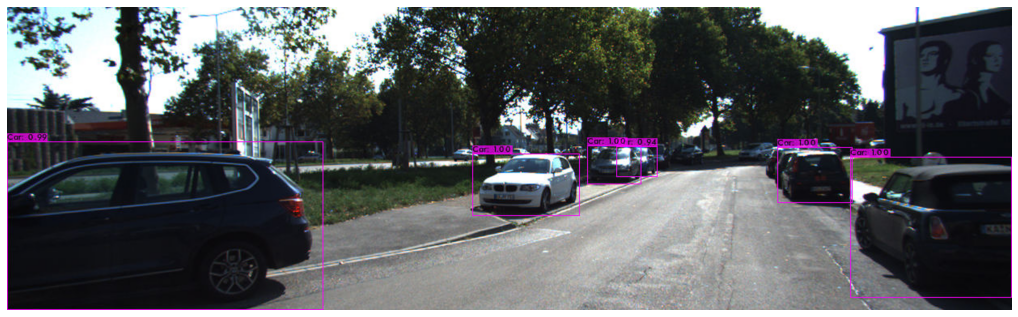

In [10]:
!./darknet detector test data/obj.data cfg/yolov4_custom.cfg backup/yolov4_custom_final.weights -dont_show data/objTest/005044.png
img_show('predictions.jpg')
!cp ./predictions.jpg /mydrive/109_2_multimedia/FinalProject_YOLO/辨識結果/005044_test.jpg

In [ ]:
#取得預測框座標
!./darknet detector valid data/obj.data cfg/yolov4_custom.cfg backup/yolov4_custom_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
results: Using default 'results'
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304

In [ ]:
!mv ./../*.txt ./data/objTest
#!mv ./data/objTest/*.txt ./..